<a href="https://colab.research.google.com/github/Sai0472003/ECO482_TORNADO_PROJECT/blob/main/Fitting_GLM_GradienBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
data = pd.read_csv('/content/drive/My Drive/GDToT/ECO482_Project/Data/clean_data.csv')

In [17]:
data.columns

Index(['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'TOR_LENGTH', 'TOR_WIDTH', 'NET_DAMAGE', 'BEGIN',
       'END', 'DURATION_HOURS', 'TextBlob_Score', 'STATE_ALABAMA',
       'STATE_ALASKA', 'STATE_ARIZONA', 'STATE_ARKANSAS', 'STATE_CALIFORNIA',
       'STATE_COLORADO', 'STATE_CONNECTICUT', 'STATE_DELAWARE',
       'STATE_DISTRICT OF COLUMBIA', 'STATE_FLORIDA', 'STATE_GEORGIA',
       'STATE_HAWAII', 'STATE_IDAHO', 'STATE_ILLINOIS', 'STATE_INDIANA',
       'STATE_IOWA', 'STATE_KANSAS', 'STATE_KENTUCKY', 'STATE_LOUISIANA',
       'STATE_MAINE', 'STATE_MARYLAND', 'STATE_MASSACHUSETTS',
       'STATE_MICHIGAN', 'STATE_MINNESOTA', 'STATE_MISSISSIPPI',
       'STATE_MISSOURI', 'STATE_MONTANA', 'STATE_NEBRASKA', 'STATE_NEVADA',
       'STATE_NEW HAMPSHIRE', 'STATE_NEW JERSEY', 'STATE_NEW MEXICO',
       'STATE_NEW YORK', 'STATE_NORTH CAROLINA', 'STATE_NORTH DAKOTA',
       'STATE_OHIO', 'STATE_OKLAHOMA', 'STATE_OREGON', 'STATE_PENNSYLVANIA',
       'STA

In [18]:
data = data.drop(columns = ['BEGIN','END', 'TOR_F_SCALE_EFU',
                            'STATE_WYOMING'])

In [19]:
data.describe()

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,TOR_LENGTH,TOR_WIDTH,NET_DAMAGE,DURATION_HOURS,TextBlob_Score,STATE_ALABAMA,...,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST VIRGINIA,STATE_WISCONSIN,TOR_F_SCALE_EF0,TOR_F_SCALE_EF1,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5
count,"25,879","25,879","25,879","25,879","25,879","25,879","25,879","25,879","25,879","25,879",...,"25,879","25,879","25,879","25,879","25,879","25,879","25,879","25,879","25,879","25,879"
mean,1,0,0,0,3,189,"1,219,855",0,0,0,...,0,0,0,0,0,0,0,0,0,0
std,12,1,1,0,4,295,"29,587,583",0,0,0,...,0,0,0,0,0,0,0,0,0,0
min,0,0,0,0,0,1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,0,0,50,0,0,-0,0,...,0,0,0,0,0,0,0,0,0,0
50%,0,0,0,0,2,80,"2,000",0,0,0,...,0,0,0,0,0,0,0,0,0,0
75%,0,0,0,0,4,200,"50,000",0,0,0,...,0,0,0,0,1,1,0,0,0,0
max,"1,150",90,158,8,50,"4,576","2,800,000,000",2,1,1,...,1,1,1,1,1,1,1,1,1,1


In [20]:
pd.set_option('display.float_format', '{:,.0f}'.format)
data['NET_DAMAGE'].describe()

,NET_DAMAGE
count,"25,879"
mean,"1,219,855"
std,"29,587,583"
min,0
25%,0
50%,"2,000"
75%,"50,000"
max,"2,800,000,000"


In [21]:
data = data[data['NET_DAMAGE'] != 0]

In [22]:
data['NET_DAMAGE'] = np.log(data['NET_DAMAGE'])

In [23]:
data

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,TOR_LENGTH,TOR_WIDTH,NET_DAMAGE,DURATION_HOURS,TextBlob_Score,STATE_ALABAMA,...,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST VIRGINIA,STATE_WISCONSIN,TOR_F_SCALE_EF0,TOR_F_SCALE_EF1,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5
0,0,0,0,0,7,400,12,0,-0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,50,12,0,-0,0,...,0,0,0,0,1,0,0,0,0,0
26,0,0,0,0,2,100,12,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27,0,0,0,0,0,10,11,0,-0,0,...,0,0,0,0,1,0,0,0,0,0
35,0,0,0,0,9,75,11,0,-0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,0,0,0,0,12,500,12,0,0,1,...,0,0,0,0,0,1,0,0,0,0
25875,0,0,0,0,1,400,12,0,0,1,...,0,0,0,0,0,1,0,0,0,0
25876,4,0,1,0,8,448,13,0,-0,0,...,0,0,0,0,0,0,1,0,0,0
25877,8,0,2,0,32,"1,790",19,0,-0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
#Fitting Gamma GLM
data_non_zero = data[data['NET_DAMAGE'] != 0]

X = sm.add_constant(data_non_zero[[feature for feature in data.columns if feature != 'NET_DAMAGE']])
y = data_non_zero['NET_DAMAGE']

gamma_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log())).fit()

y_pred_glm = gamma_model.predict(X)  # This line is added to get predictions
mse = np.mean((gamma_model.fittedvalues - y)**2)
rmse = np.sqrt(mse)

import numpy as np

# Define the threshold (5% in this case)
threshold = 0.10  # 5% threshold

# Calculate the absolute percentage error
percentage_error = np.abs((y_pred_glm - y) / y)

# Calculate the fraction of predictions within the threshold (e.g., 5%)
accuracy_within_threshold = np.mean(percentage_error <= threshold)

print(f'Fraction of predictions within ±{threshold*100}%: {accuracy_within_threshold}')
print('mse = ', mse)
print('rmse = ',rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


Fraction of predictions within ±10.0%: 0.5480984340044742
mse =  2.4227575649677036
rmse =  1.5565209812166694


In [25]:
# Display the summary of the model
print(gamma_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             NET_DAMAGE   No. Observations:                13410
Model:                            GLM   Df Residuals:                    13346
Model Family:                   Gamma   Df Model:                           63
Link Function:                    log   Scale:                        0.020268
Method:                          IRLS   Log-Likelihood:                -25025.
Date:                Sun, 30 Mar 2025   Deviance:                       279.36
Time:                        18:50:53   Pearson chi2:                     270.
No. Iterations:                    15   Pseudo R-squ. (CS):             0.5631
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [47]:
# Split your data into train and test sets
data_non_zero = data[data['NET_DAMAGE'] != 0] #does this structurally change our data

X = sm.add_constant(data_non_zero[[feature for feature in data.columns if feature != 'NET_DAMAGE']])
y = data_non_zero['NET_DAMAGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

import numpy as np

# Define the threshold (5% in this case)
threshold = 0.10  # 5% threshold

# Calculate the absolute percentage error
# Use y_test instead of y to ensure consistent shapes
percentage_error = np.abs((y_pred - y_test) / y_test)

# Calculate the fraction of predictions within the threshold (e.g., 5%)
accuracy_within_threshold = np.mean(percentage_error <= threshold)

print(f'Fraction of predictions within ±{10}%: {accuracy_within_threshold}')
print(mse)
print(rmse)

Fraction of predictions within ±10%: 0.5667412378821775
2.165051618661931
1.4714114375870302


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Split your data into train and test sets
data_non_zero = data[data['NET_DAMAGE'] != 0]

X = sm.add_constant(data_non_zero[[feature for feature in data.columns if feature != 'NET_DAMAGE']])
y = data_non_zero['NET_DAMAGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
gb_model = GradientBoostingRegressor()

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_samples_split': [2]
}


# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Best parameters from the search
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 2.1513595292606373
Root Mean Squared Error: 1.4667513522273083


                 Feature  Importance
61       TOR_F_SCALE_EF0           0
1        INJURIES_DIRECT           0
5             TOR_LENGTH           0
62       TOR_F_SCALE_EF1           0
6              TOR_WIDTH           0
..                   ...         ...
54            STATE_UTAH           0
52       STATE_TENNESSEE           0
56  STATE_VIRGIN ISLANDS           0
55         STATE_VERMONT           0
59   STATE_WEST VIRGINIA           0

[67 rows x 2 columns]


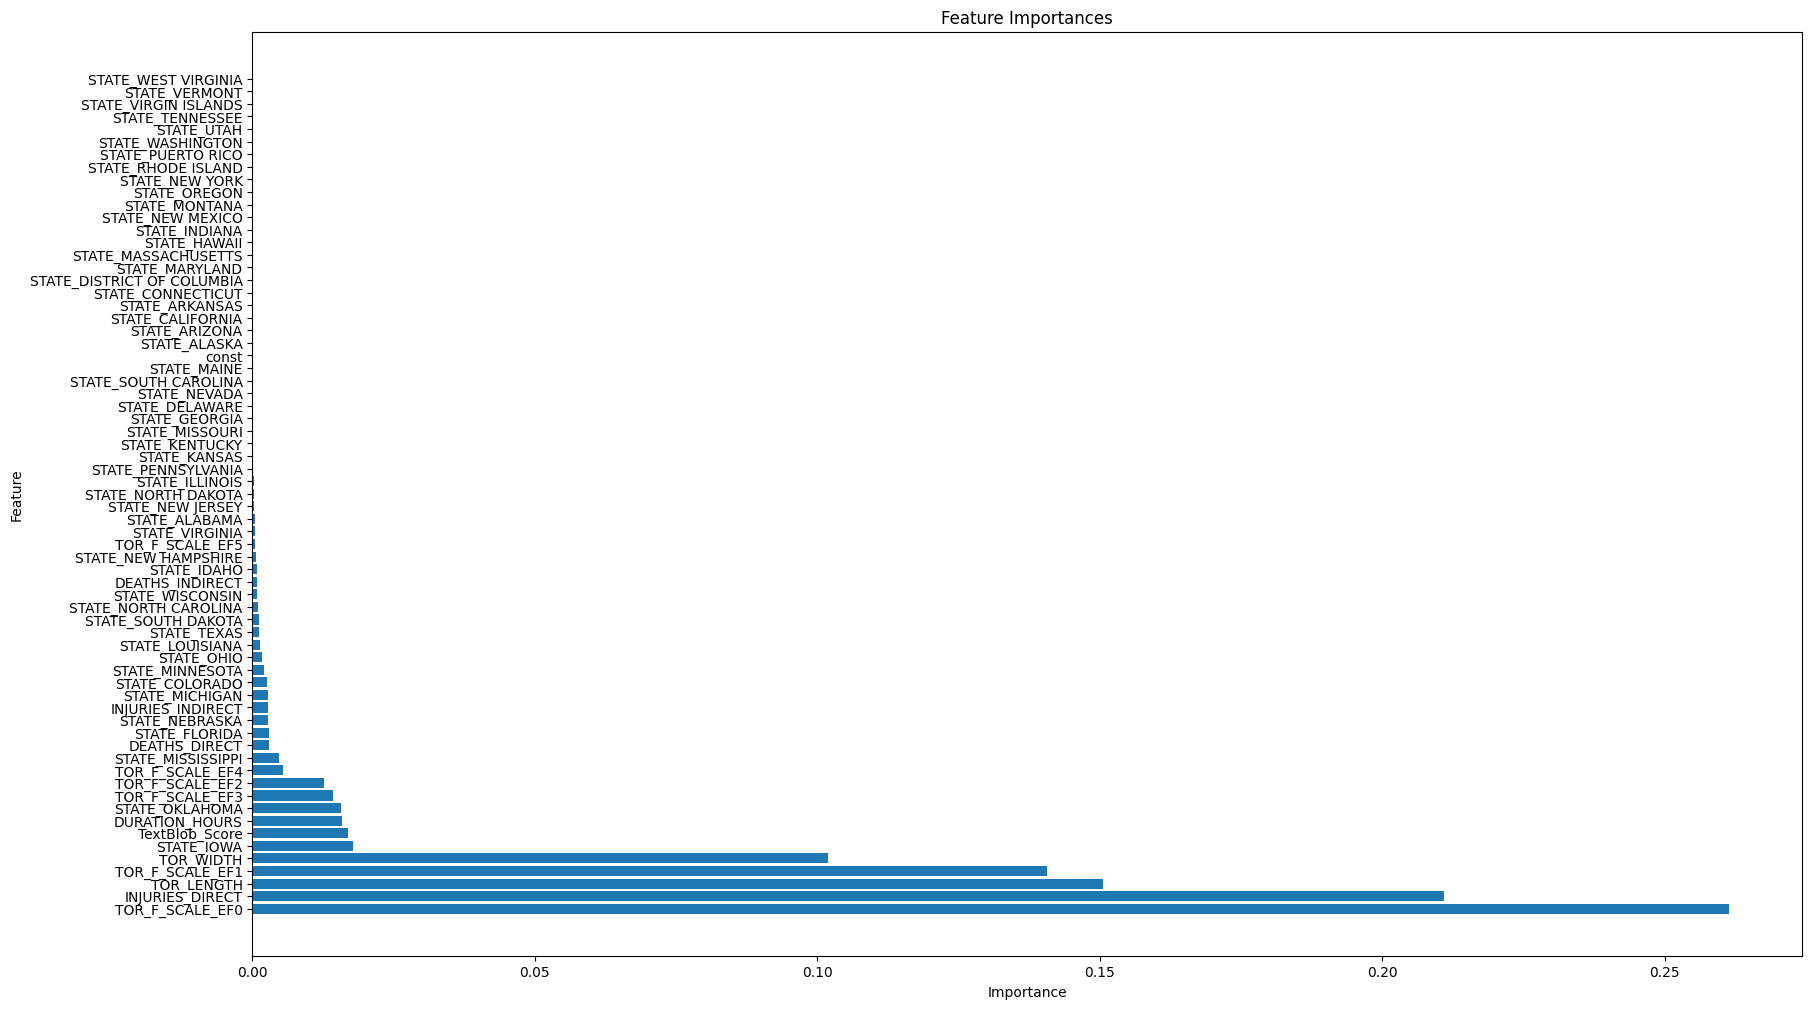

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature importances
importances = best_gb_model.feature_importances_

# Create a DataFrame to display the features and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Column names of your features
    'Importance': importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the strongest predictors
print(feature_importance_df)

# Optional: Plot the feature importances
plt.figure(figsize=(20, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [49]:
len(feature_importance_df[feature_importance_df['Importance'] > 0])

44

In [50]:
len(feature_importance_df)

67